In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("exercise_dataset.csv")
print(df.head())

   ID     Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0   1   Exercise 2     286.959851     91.892531      96.301115   45    Male   
1   2   Exercise 7     343.453036     64.165097      61.104668   25    Male   
2   3   Exercise 4     261.223465     70.846224      71.766724   20    Male   
3   4   Exercise 5     127.183858     79.477008      82.984456   33    Male   
4   5  Exercise 10     416.318374     89.960226      85.643174   29  Female   

   Duration  Heart Rate        BMI Weather Conditions  Exercise Intensity  
0        37         170  29.426275              Rainy                   5  
1        43         142  21.286346              Rainy                   5  
2        20         148  27.899592             Cloudy                   4  
3        39         170  33.729552              Sunny                  10  
4        34         118  23.286113             Cloudy                   3  


In [5]:
df.describe()

,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,1115.585048,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,1.000000,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,966.750000,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,1932.500000,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,2898.250000,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,3864.000000,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


In [7]:
df.isnull().sum()

ID                    0
Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64

# Gender Distribution

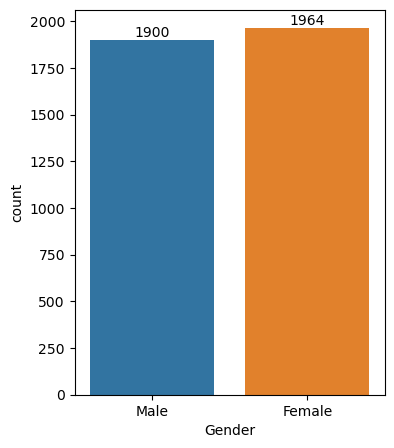

In [9]:
plt.figure(figsize= (4,5))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
gp = df.groupby("Gender").agg({"Calories Burn":'mean',"Heart Rate":'mean',"BMI":'mean',"Exercise Intensity":'mean'})
print(gp)

        Calories Burn  Heart Rate        BMI  Exercise Intensity
Gender                                                          
Female     305.079815  139.099796  26.776949            5.471996
Male       298.535402  140.478947  26.827848            5.442105


# Health scenario

In [11]:
ageFilter = df['Age'] >= 20
df = df[ageFilter]

In [12]:
def bmi_category(bmi):
    if bmi >= 30:
        return 'Obese'
    elif bmi >= 25.0:
        return 'Overweight'
    elif bmi >= 18.5:
        return 'Healthy'
    else:
        return 'Underweight'

In [13]:
df['BMI_cateory'] = df['BMI'].apply(bmi_category)
df['BMI_cateory'].value_counts()

Healthy       1450
Overweight    1120
Obese         1114
Name: BMI_cateory, dtype: int64

# Effect of exercise Intensity on Health

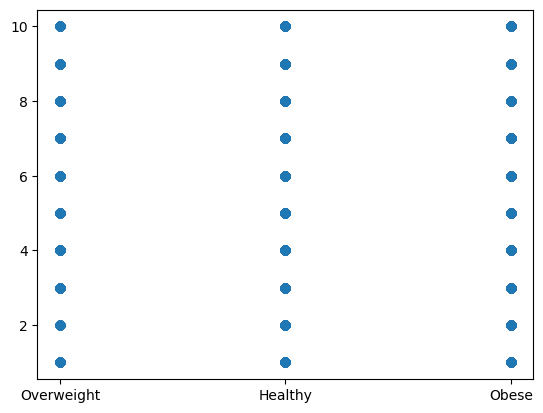

In [26]:
plt.scatter(x = "BMI_cateory", y = "Exercise Intensity", data = df)

# Gender Distribution on the basis of Exercise Intensity

<Axes: xlabel='Gender', ylabel='Exercise Intensity'>

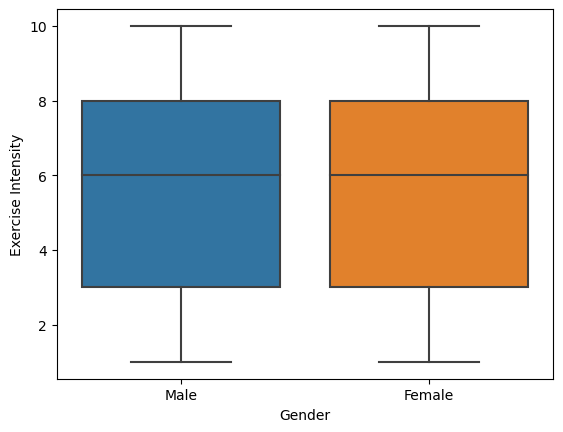

In [26]:
sns.boxplot(x = "Gender", y = "Exercise Intensity", data = df)